# Advent of Code 2021

In [1]:
from aocd.models import Puzzle
from aocd import submit
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from functools import reduce

## Day 1 - Sonar Sweep

In [13]:
puzzle = Puzzle(2021, 1)

In [12]:
test = np.array([199,200,208,210,200,207,240,269,290,263])
gt = np.roll(test,-1) > test
sum(gt[:-1])

7

In [18]:
data = puzzle.input_data
data = np.array([int(x) for x in data.splitlines()])

In [20]:
gt = np.roll(data, -1) > data
answer = sum(gt[:-1])

In [22]:
submit(answer, day=1, year=2021)

answer a: None
submitting for part a


That's the right answer!  You are one gold star closer to finding the sleigh keys. [Continue to Part Two]


<Response [200]>

In [24]:
series = pd.Series(data)
roll = series.rolling(3).sum()
answer = (roll.diff() > 0).sum()

In [ ]:
submit(answer, 'b', 1, 2021)

## Day 2 - Dive!

In [3]:
puzzle = Puzzle(2021, 2)
data = puzzle.input_data

In [10]:
class Diver:
	def __init__(self, puzzle = 'a'):
		self.h = 0
		self.v = 0
		self.aim = 0
		self.puzzle = puzzle

	def parse_line(self, line):
		direction, value = line.split(" ")
		value = int(value)
		if direction == 'forward':
			self.h += value
			if self.puzzle == 'b':
				self.v += self.aim * value
		if direction == 'backward':
			self.h -= value
		if direction == 'up':
			if self.puzzle == 'a':
				self.v -= value
			else:
				self.aim -= value
		if direction == 'down':
			if self.puzzle == 'a':
				self.v += value
			else:
				self.aim += value

In [8]:
d = Diver()
for row in data.splitlines():
	d.parse_line(row)
answer = d.h * d.v

In [9]:
submit(answer, 'a', 2, 2021)

That's the right answer!  You are one gold star closer to finding the sleigh keys. [Continue to Part Two]


<Response [200]>

In [11]:
d = Diver('b')
for row in data.splitlines():
	d.parse_line(row)
answer = d.h * d.v

In [12]:
submit(answer, 'b', 2, 2021)

That's the right answer!  You are one gold star closer to finding the sleigh keys.You have completed Day 2! You can [Shareon
  Twitter
Mastodon] this victory or [Return to Your Advent Calendar].


<Response [200]>

## Day 3 - Binary Diagnostic

In [2]:
puzzle = Puzzle(2021, 3)
data = puzzle.input_data

In [3]:
arr = np.array([[int(x) for x in line] for line in data.splitlines()])

In [4]:
arr_df = pd.DataFrame(arr)

In [5]:
def to_decimal(x):
	return int("".join([str(int(_)) for _ in x]),2)

In [6]:
m = arr_df.mode(axis=0).astype(bool).values[0]
gamma = to_decimal(m)
epsilon = to_decimal(~m)

In [9]:
answer = gamma * epsilon

In [61]:
submit(answer, 'a',3,2021)

That's the right answer!  You are one gold star closer to finding the sleigh keys. [Continue to Part Two]


<Response [200]>

In [8]:
most_common_per_bit = m.astype(int)
least_common_per_but = (~m).astype(int)


In [47]:
s = np.array([all(x) for x in (arr == most_common_per_bit)])

In [153]:
def f(array,i, most=True):
	if len(array) == 1:
		return to_decimal(array[0])
	else:
		a_df = pd.DataFrame(array)
		equals = a_df.sum(axis=0) == len(a_df)/2
		mask = a_df.mode(axis=0).astype(bool).values[0]
		mask[equals] = True
		if not most:
			mask = ~mask
		value = int(mask[i])
		l = array[:,i] == value
		array = array[l]
		return f(array, i+1, most)

In [154]:
def get_number(arr):
	return [f(arr.copy(),0, sign) for sign in [True, False]]
				

In [157]:
a = get_number(arr)

In [158]:
answer = a[0] * a[1]

In [159]:
answer

4996233

In [160]:
submit(answer, 'b',3, 2021)

That's the right answer!  You are one gold star closer to finding the sleigh keys.You have completed Day 3! You can [Shareon
  Twitter
Mastodon] this victory or [Return to Your Advent Calendar].


<Response [200]>

## Day 4 - Bingo

In [161]:
puzzle = Puzzle(2021, 4)
data = puzzle.input_data

In [165]:
l = data.splitlines()
numbers = l[0]

In [254]:
class Board:
	def __init__(self, string):
		self.arr = np.array([np.fromstring(s, sep=" ") for s in string]).astype(int)
		self.mask = np.zeros_like(self.arr).astype(bool)
		self.last_value = 0
	def add_number(self, value):
		self.mask = self.mask | (self.arr == value)
		self.last_value = value
	
	@property
	def won(self):
		row_counts = any([all(x) for x in self.mask])
		col_counts = any([all(x) for x in self.mask.T])
		return row_counts | col_counts
		
	def unmarked_sum(self):
		return self.arr[~self.mask].sum() * self.last_value

In [230]:
numbers = np.fromstring(l[0], sep=',').astype(int)

In [274]:
def make_boards():
	boards = []
	for i in range(100):
		s = 2 + (i*6)
		e = s+5
		v = l[s:e]
		b = Board(v)
		boards.append(b)
	return boards

In [256]:
boards = make_boards()
for n in numbers:
	for b in boards:
		b.add_number(n)
		if b.won:
			answer = b.unmarked_sum()
		

82440
39388
66123
80352
56916
8370
25947
28070
27268
25664
0
51590
57021
21582
1308
49704
15696
56898
49005
38115
40590
33594
6108
8340
15568
32804
35584
52820
50596
34435
30070
10670
25705
20286
20670
42930
34125
39130
33670
22344
22850
7902
7463
32047
5707
27270
30300
24240
10605
25755
23556
24915
31280
29440
10140
12168
13677
873
6890
11856
17472
4575
7560
3240
4440
11280
840
3375
4350
675
5850
4875
5400
450
854
0
0
0
0
0


In [257]:
submit(82440, 'a', 4, 2021)

That's the right answer!  You are one gold star closer to finding the sleigh keys. [Continue to Part Two]


<Response [200]>

In [276]:
won_boards = []
boards = make_boards()
for n in numbers:
	for j,b in enumerate(boards):
		if b not in won_boards:
			b.add_number(n)
			if b.won:
				won_boards.append(b)

In [277]:
len(won_boards)

100

In [278]:
won_boards[-1].unmarked_sum()

20774

In [279]:
submit(20774,'b',4,2021)

That's the right answer!  You are one gold star closer to finding the sleigh keys.You have completed Day 4! You can [Shareon
  Twitter
Mastodon] this victory or [Return to Your Advent Calendar].


<Response [200]>

## Day 5 - Hydrothermal Venture

In [2]:
puzzle = Puzzle(2021,5)
data = puzzle.input_data

In [3]:
def parse_coords(x):
	coords = x.split(" ")
	x1, y1 = np.fromstring(coords[0],sep=',').astype(int)
	x2, y2 = np.fromstring(coords[-1],sep=',').astype(int)
	return np.array([x1,y1,x2,y2])

In [4]:
coords = np.array([parse_coords(x) for x in data.splitlines()])

In [69]:
class Grid:
	def __init__(self,size, include_diags=False):
		self.include_diags = include_diags
		self.grid = np.zeros(shape=(size,size))

	def add_coords(self,x1,y1,x2,y2):
		if x1 == x2:
			s,e =self.get_bounds(y1,y2)
			self.grid[x1,s:e] += 1
		elif y1 == y2:
			s,e = self.get_bounds(x1,x2)
			self.grid[s:e, y1] += 1
		elif self.include_diags:
			xd = int((x2-x1)/abs(x2-x1))
			yd = int((y2-y1)/abs(y2-y1))
			m = yd/xd
			for i in range(abs(x1-x2)+1):
				x = x1+int(i*xd)
				y = y1+int(i*yd)
				self.grid[x,y] += 1

	@staticmethod
	def get_bounds(x,y):
		if x < y:
			s = x
			e = y + 1
		else:
			s = y
			e = x + 1
		return s,e

	def __str__(self):
		s = self.grid.astype(int).astype(str)
		s[s == '0'] = '.'
		return "\n".join(["".join(list(x)) for x in s])

In [360]:
g = Grid(1000)
for c in coords:
	g.add_coords(*c)

In [331]:
answer = len(g.grid[g.grid >= 2].flatten())

In [332]:
answer

4873

In [333]:
submit(answer, 'a', 5, 2021)

That's the right answer!  You are one gold star closer to finding the sleigh keys. [Continue to Part Two]


<Response [200]>

In [83]:
g = Grid(2500, include_diags=True)
for c in coords:
	g.add_coords(*c)
answer = len(g.grid[g.grid >= 2].flatten())

In [84]:
answer

19472

In [85]:
submit(answer,'b',5)

That's the right answer!  You are one gold star closer to finding the sleigh keys.You have completed Day 5! You can [Shareon
  Twitter
Mastodon] this victory or [Return to Your Advent Calendar].


<Response [200]>

In [47]:
g = Grid(10, include_diags=True)

In [78]:
t = """0,9 -> 5,9
8,0 -> 0,8
9,4 -> 3,4
2,2 -> 2,1
7,0 -> 7,4
6,4 -> 2,0
0,9 -> 2,9
3,4 -> 1,4
0,0 -> 8,8
5,5 -> 8,2"""
test_coords = np.array([parse_coords(x) for x in t.splitlines()])
g = Grid(10, include_diags=True)
for c in test_coords:
	g.add_coords(*c)

In [79]:
g.grid = g.grid.T
print(g)

1.1....11.
.111...2..
..2.1.111.
...1.2.2..
.112313211
...1.2....
..1...1...
.1.....1..
1.......1.
222111....


In [82]:
g.grid[g.grid >=2].sum()

26.0

In [73]:
g = Grid(10, include_diags=True)

In [74]:
g.add_coords(1,1,3,3)


In [75]:
g.add_coords(9,7,7,9)

In [76]:
print(g)

..........
.1........
..1.......
...1......
..........
..........
..........
.........1
........1.
.......1..


In [53]:
g.grid

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

## Day 6 - Lanternfish 

In [2]:
puzzle = Puzzle(day=6, year=2021)
data = puzzle.input_data

In [3]:
class Laternfish:
	def __init__(self, days):
		self.days = days
	def count_down(self):
		if self.days == 0:
			self.days = 6
		else:
			self.days -= 1
	
	def spawn_fish(self):
		if self.days == 0:
			return Laternfish(8)
		else:
			return None

In [4]:
def count_fish(init_vals, days):
	fish_list = [Laternfish(v) for v in init_vals]
	for d in range(days):
		new_fishes = []
		for fish in fish_list:
			new_fish = fish.spawn_fish()
			fish.count_down()
			if new_fish is not None:
				new_fishes.append(new_fish)
		if len(new_fishes) > 0:
			fish_list.extend(new_fishes)
	return len(fish_list) 

In [117]:
count_fish([3,4,3,1,2], 18)

26

In [5]:
init_fish = np.fromstring(data,sep=',').astype(int)
answer = count_fish(init_fish, 80)

In [125]:
submit(answer, 'a', 6, 2021)

That's the right answer!  You are one gold star closer to finding the sleigh keys. [Continue to Part Two]


<Response [200]>

In [182]:
def count_fish_arr(init_fish, days):
	for fish in init_fish:
		num_spawns = fish 

In [25]:
from functools import lru_cache

In [65]:
@lru_cache(1000)
def n(x,d=7):
	if x == 0:
		return 1
	if (x % d) == 0:
		return n(x-1,7) + n(x-2,8)
	else:
		return n(x-1,7)


In [142]:
def count_fish(init_fish, days):
	f = {x:0 for x in range(-1,9)}
	for v in init_fish:
		f[v] += 1
	for d in range(days):
		for k,v in f.items():
			if k >= 0:
				f[k-1] = f[k]
		f[8] = f[-1]
		f[6] += f[-1]
		f[-1] = 0
	return sum(f.values())


In [147]:
%time count_fish([3,4,3,1,2],18)

CPU times: user 31 µs, sys: 0 ns, total: 31 µs
Wall time: 33.6 µs


26

In [148]:
%time count_fish(init_fish, 18)

CPU times: user 175 µs, sys: 7 µs, total: 182 µs
Wall time: 185 µs


1570

In [149]:
%time count_fish(init_fish, 256)

CPU times: user 408 µs, sys: 0 ns, total: 408 µs
Wall time: 411 µs


1609314870967

In [150]:
answer = count_fish(init_fish, 256)

In [151]:
submit(answer, 'b', 6, 2021)

That's the right answer!  You are one gold star closer to finding the sleigh keys.You have completed Day 6! You can [Shareon
  Twitter
Mastodon] this victory or [Return to Your Advent Calendar].


<Response [200]>

## Day 7 - The Treachery of Whales

In [152]:
puzzle = Puzzle(2021,7)
data = puzzle.input_data

In [154]:
t = np.array([16,1,2,0,4,2,7,1,2,14])

In [158]:
def dist(crabs, x):
	return np.abs(crabs - x).sum()
def min_dist(crabs):
	x = set(crabs)
	return min([dist(crabs,d) for d in x])

In [161]:
crabs = np.fromstring(data, sep=',').astype(int)

In [162]:
answer = min_dist(crabs)

In [164]:
submit(answer,'a',7)

That's the right answer!  You are one gold star closer to finding the sleigh keys. [Continue to Part Two]


<Response [200]>

In [181]:
def arr(x):
	return 0.5*(x * (x+1))
def extra_dist(crabs, x):
	return arr(np.abs(crabs - x)).sum().astype(int)
def min_dist(crabs):
	x = set(crabs)
	return min([extra_dist(crabs,d) for d in x])

In [182]:
extra_dist(t, 2).sum()

206

In [183]:
answer = min_dist(crabs)

In [184]:
submit(answer, 'b',7)

That's the right answer!  You are one gold star closer to finding the sleigh keys.You have completed Day 7! You can [Shareon
  Twitter
Mastodon] this victory or [Return to Your Advent Calendar].


<Response [200]>

## Days 8 - Seven Segment Search

In [5]:
from itertools import permutations

In [6]:
puzzle = Puzzle(2021, 8)
data = puzzle.input_data

In [7]:
lines = data.splitlines()

In [122]:
	{0:'abcefg',
		1:'cf',
		2:'acdeg',
		3:'acdfg',
		4:'bcdf',
		5:'abdfg',
		6:'abdefg',
		7:'acf',
		8:'abcdefg',
		9:'abcdfg'

	}.values()

dict_values(['abcefg', 'cf', 'acdeg', 'acdfg', 'bcdf', 'abdfg', 'abdefg', 'acf', 'abcdefg', 'abcdfg'])

In [221]:
letters = ['a','b','c','d','e','f','g']
values = sorted(['abcefg', 'cf', 'acdeg', 'acdfg', 'bcdf', 'abdfg', 'abdefg', 'acf', 'abcdefg', 'abcdfg'],key=len)
perms = {}

def swap_letters(perm, digits):
	d = {perm[i]:x for i,x in enumerate(letters)}
	vals = []
	for digit in digits:
		x = ''.join(sorted([d[c] for c in digit]))
		vals.append(x)
	return vals

for perm in permutations(letters, 7):
	d = {letters[i]: perm[i] for i in range(7)}
	perms[perm] = swap_letters(perm, values)
	
def try_map(m, v1, v2):
	for v in v1:	
		vn = ''.join(sorted([m[x] for x in v]))
		if vn not in v2:
			return False
	return True



class Signal:
	segment_dict = {'a':[0,2,3,5,6,7,8,9],
'b':[0,4,5,6,8,9],
'c':[0,1,2,3,4,7,8,9],
'd':[2,3,4,5,6,8,9],
'e':[0,2,6,8],
'f':[0,1,3,4,5,6,7,8,9],
'g':[0,2,3,5,6,8,9]}
	number_dict = {
		'abcefg':0,
		'cf':1,
		'acdeg':2,
		'acdfg':3,
		'bcdf':4,
		'abdfg':5,
		'abdefg':6,
		'acf':7,
		'abcdefg':8,
		'abcdfg':9

	}
	# number_lengths = {k:len(v) for k,v in Signal.number_dict.items()}
	perms = perms



	def __init__(self, string) -> None:
		self.digits, self.number = [x.split(" ") for x in string.split("|")]
		self.number = [x for x in self.number if x != '']
		self.digits = self.digits[:-1]
		self.digits = sorted(self.digits, key=len)
		self.digits = [''.join(sorted(x)) for x in self.digits]

	def count_numbers(self):
		counts = np.array([len(x) for x in self.number])
		uniques = [1,4,7,8]
		dig_count = {}
		for i in uniques:
			v = self.number_lengths[i]
			dig_count[i] = sum(counts == v)
		return dig_count

	def decode(self):
		for k, v in self.perms.items():
			if all([x in v for x in self.digits]):
				return k, v

	def get_number(self):
		code = {x:v for x,v in zip(letters, self.decode()[0])}
		vs =[]
		for digit in self.number:
			v = [code[d] for d in digit]
			v = ''.join(sorted(v))
			vs.append(str(self.number_dict[v]))
		return int(''.join(vs))
		


In [222]:
test = Signal("acedgfb cdfbe gcdfa fbcad dab cefabd cdfgeb eafb cagedb ab |cdfeb fcadb cdfeb cdbaf")

In [226]:
signals = [Signal(l) for l in lines]

In [47]:
counts = [s.count_numbers() for s in signals]

In [52]:
answer =  pd.DataFrame(counts).sum().sum()

In [54]:
submit(answer, 'a',8)

That's the right answer!  You are one gold star closer to finding the sleigh keys. [Continue to Part Two]


<Response [200]>

In [229]:
answer = sum([s.get_number() for s in signals])

In [230]:
submit(answer, 'b',8)

That's the right answer!  You are one gold star closer to finding the sleigh keys.You have completed Day 8! You can [Shareon
  Twitter
Mastodon] this victory or [Return to Your Advent Calendar].


<Response [200]>

In [228]:
sum(answer)

1084606

## Day 9 - Smoke Basin

In [2]:
puzzle = Puzzle(2021, 9)
data = puzzle.input_data

In [3]:
test = """2199943210
3987894921
9856789892
8767896789
9899965678""".splitlines()

arr1 = np.array([[int(x) for x in t] for t in test])

In [4]:
def find_low_points(arr):
	up = arr.shift(1).fillna(1e6)
	down = arr.shift(-1).fillna(1e6)
	left = arr.T.shift(1).T.fillna(1e6)
	right = arr.T.shift(-1).T.fillna(1e6)
	v = (arr < up) & (arr < down) & (arr < left) & (arr < right)
	return v

def risk_level(arr):
	lp = find_low_points(arr)
	return int((arr[lp] + 1).sum().sum())

In [275]:
risk_level(arr)

15

In [25]:
arr = np.array([[int(x) for x in t] for t in data.splitlines()])

In [278]:
arr_df = pd.DataFrame(arr)

In [279]:
answer = risk_level(arr_df)

In [281]:
submit(answer,'a',9)

That's the right answer!  You are one gold star closer to finding the sleigh keys. [Continue to Part Two]


<Response [200]>

In [21]:
class Smoke:
	def __init__(self, array):
		self.array = array
		self.xmax, self.ymax = array.shape
		self.count = 0
		self.mask = np.zeros_like(self.array).astype(bool)
	
	def find_low_points(self):
		arr = pd.DataFrame(self.array)
		up = arr.shift(1).fillna(1e6)
		down = arr.shift(-1).fillna(1e6)
		left = arr.T.shift(1).T.fillna(1e6)
		right = arr.T.shift(-1).T.fillna(1e6)
		v = (self.array < up) & (self.array < down) & (self.array < left) & (self.array < right)
		return v.values

	def risk_level(self):
		lp = find_low_points(self.array)
		return int((self.array[lp] + 1).sum().sum())

	def low_point_coords(self):
		lp = self.find_low_points()
		coords = np.transpose(lp.nonzero())
		return coords

	def traverse_basin(self, i, j):
		v = self.array[i,j]
		for x in range(i+1, self.xmax):
			if (9 > self.array[x,j] > v) and not self.mask[x,j]:
				self.mask[x,j] = True
				self.traverse_basin(x,j)
			else:
				break
		for x in range(i-1,-1,-1) :
			if (9 > self.array[x,j] > v) and not self.mask[x,j]:
				self.mask[x,j] = True
				self.traverse_basin(x,j)
			else:
				break
		for y in range(j+1, self.ymax):
			if (9 > self.array[i,y] > v) and not self.mask[i,y]:
				self.mask[i,y] = True
				self.traverse_basin(i,y)
			else:
				break
		for y in range(j-1,-1,-1):
			if (9 > self.array[i,y] > v) and not self.mask[i,y]:
				self.mask[i,y] = True
				self.traverse_basin(i,y)
			else:
				break
		return self.mask.sum() + 1

	def get_basins(self):
		basins = []
		for coord in self.low_point_coords():
			self.mask = np.zeros_like(self.array).astype(bool)
			basin_size = self.traverse_basin(*coord)
			basins.append(basin_size)
		return basins
		

In [22]:
s = Smoke(arr1)
coords = s.low_point_coords()
basins = s.get_basins()

In [26]:
s = Smoke(arr)
basins = s.get_basins()

In [33]:
answer = np.array(sorted(basins)[-3:]).prod()

In [34]:
submit(answer,'b',9)

That's the right answer!  You are one gold star closer to finding the sleigh keys.You have completed Day 9! You can [Shareon
  Twitter
Mastodon] this victory or [Return to Your Advent Calendar].


<Response [200]>

## Day 10 - Syntax Scoring

In [22]:
puzzle = Puzzle(2021, 10)
data = puzzle.input_data

In [23]:
matches = {'{':'}', '(':')','<':'>','[':']',
'}':'{',']':'[',')':'(','>':'<'}

In [24]:
import re

AssertionError: 

In [40]:
opening = list('([{<')
closing = list(')]}>')
points = [1,2,3,4]
illegal_character_count = {'}':0,')':0,']':0,'>':0}

def check_line(line, return_char=True):
	stack = []
	flag = True
	for char in line:
		if char in opening:
			stack.append(char)
		elif char in closing:
			if stack.pop() != opening[closing.index(char)]:
				illegal_character_count[char] += 1
				flag = False
				if return_char:
					return char
				else:
					break
	if flag:
		total_score = 0
		while len(stack) != 0:
			t = stack.pop()
			c = closing[opening.index(t)]
			total_score *= 5
			total_score += points[closing.index(c)]
		return total_score



In [41]:
assert check_line('{([(<{}[<>[]}>{[]{[(<()>') == '}'
assert check_line('[[<[([]))<([[{}[[()]]]') == ')'
assert check_line('[{[{({}]{}}([{[{{{}}([]') == ']'
assert check_line('[<(<(<(<{}))><([]([]()') == ')'
assert check_line('<{([([[(<>()){}]>(<<{{') == '>'

In [46]:
illegal_character_count = {'}':0,')':0,']':0,'>':0}
scores = []
for line in data.splitlines():
	scores.append(check_line(line, False))

In [35]:
scores = {'}':1197,')':3,']':57,'>':25137}
answer = 0
for k in illegal_character_count.keys():
	answer += scores[k] * illegal_character_count[k]

In [36]:
submit(answer, 'a',10)

That's the right answer!  You are one gold star closer to finding the sleigh keys. [Continue to Part Two]


<Response [200]>

In [49]:
all_scores = sorted([s for s in scores if s])

In [50]:
answer = all_scores[int(len(all_scores) / 2)]

In [51]:
answer

2289754624

In [52]:
len(all_scores)

45

In [54]:
all_scores[22]

2289754624

In [55]:
submit(answer,'b',10)

That's the right answer!  You are one gold star closer to finding the sleigh keys.You have completed Day 10! You can [Shareon
  Twitter
Mastodon] this victory or [Return to Your Advent Calendar].


<Response [200]>

## Day 11 - Dumbo Octopus

In [2]:
puzzle = Puzzle(2021, 11)
data = puzzle.input_data

In [3]:
test = """5483143223
2745854711
5264556173
6141336146
6357385478
4167524645
2176841721
6882881134
4846848554
5283751526"""

In [87]:
class Octopus:
	def __init__(self, string):
		self.array = np.array([[int(x) for x in s] for s in string.splitlines()])
		self.count = 0

	def step(self):
		self.inc()
		self.flash()
		self.reset()
		self.count_flashes()

	def inc(self):
		self.array += 1
	
	def flash(self):
		flashed_mask = np.zeros_like(self.array)
		adjacents = [True]
		while len(adjacents) > 0:
			max_levels = self.array > 9
			to_flash = (max_levels & ~flashed_mask)
			if to_flash.sum() == 0:
				return
			flash_coords = np.transpose(to_flash.nonzero())
			adjacents = [self.get_adjacents(*c) for c in flash_coords]
			flashed_mask = flashed_mask | max_levels
			for adj in adjacents:
				self.array[adj[:,0], adj[:,1]] += 1
		return flash_coords

	def get_adjacents(self, i,j):
		xmax, ymax = self.array.shape
		adj = np.array([[i, j + 1], 
			   [i, j-1], 
			   [i+1,j], 
			   [i-1,j],
			   [i+1,j+1],
			   [i-1,j-1],
			   [i+1,j-1],
			   [i-1,j+1]])
		ix = np.logical_and(0 <= adj[:,0], adj[:,0] < xmax) & np.logical_and(0 <= adj[:,1], adj[:,1] < ymax)
		return adj[ix]
	
	def reset(self):
		self.array[self.array > 9] = 0
	
	def count_flashes(self):
		self.count += sum(sum(self.array == 0))
		
	def __repr__(self) -> str:
		return self.array.__repr__()

In [93]:
o = Octopus(test)

In [94]:
for i in range(10):
	o.step()

In [96]:
o = Octopus(data)

In [97]:
for i in range(100):
	o.step()

answer = o.count

In [98]:
submit(answer,'a', 11)

That's the right answer!  You are one gold star closer to finding the sleigh keys. [Continue to Part Two]


<Response [200]>

In [99]:
o = Octopus(data)
size = o.array.shape
size = size[0] * size[1]
all_flashed = False
c = o.count
i = 0
while not all_flashed:
	i += 1
	c1 = o.count
	o.step()
	c2 = o.count
	all_flashed = (c2-c1) == size


In [101]:
submit(i, 'b', 11,2021)

That's the right answer!  You are one gold star closer to finding the sleigh keys.You have completed Day 11! You can [Shareon
  Twitter
Mastodon] this victory or [Return to Your Advent Calendar].


<Response [200]>

## Day 12 - Passage Pathing

In [3]:
puzzle = Puzzle(2021, 12)
data = puzzle.input_data

In [4]:
import networkx as nx

In [5]:
test = """start-A
start-b
A-c
A-b
b-d
A-end
b-end"""

In [6]:
def build_graph(input):
	G = nx.Graph()
	for line in input.splitlines():
		s, e = line.split("-")
		G.add_edge(s,e)
		G[s][e]['weight'] = 0
	for node in G.nodes.keys():
		if node.lower() == node:
			G.nodes[node]['size'] = 'small'
			G.nodes[node]['weight'] = 0
		else:
			G.nodes[node]['size'] = 'big'
			G.nodes[node]['weight'] = -1
	return G

In [23]:
G = build_graph(test)

In [24]:
from copy import copy

In [37]:
paths = []
def find_paths(G: nx.Graph, node, path=None, max_small_visits=None):
	if max_small_visits is None:
		max_small_visits = 1
	if path is None:
		path = []
	if node == 'end':
		paths.append(copy(path))
		return path
	nodes = [x for x in G.neighbors(node) if (G.nodes[x]['weight'] < max_small_visits) and (x != 'start')]
	for new_node in nodes:
		
		if G.nodes[new_node]['size'] == 'small':
			G.nodes[new_node]['weight'] += 1
			if G.nodes[new_node]['weight'] == 2:
				max_small_visits = 1

		path.append((node, new_node))
		path = find_paths(G, new_node, path, max_small_visits)
		path.pop()
		if G.nodes[new_node]['size'] == 'small':
			G.nodes[new_node]['weight'] -= 1
			max_weight = max(G.nodes[x]['weight'] for x in G.nodes)
			if max_weight == 1:
				max_small_visits = 2
	return path
find_paths(G,'start',None,None)
len(paths)


10

len(paths)

In [38]:
G = build_graph(data)

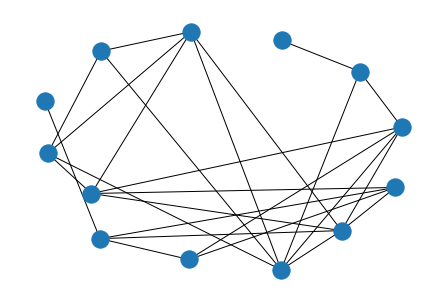

In [39]:
nx.draw(G)

In [18]:
paths = []
a = find_paths(G, 'start')

In [20]:
answer = len(paths)
submit(answer,'a', 12, 2021)

That's the right answer!  You are one gold star closer to finding the sleigh keys. [Continue to Part Two]


<Response [200]>

In [40]:
paths = []
a = find_paths(G, 'start', None, 2)

In [41]:
answer = len(paths)
submit(answer,'b',12,2021)

That's the right answer!  You are one gold star closer to finding the sleigh keys.You have completed Day 12! You can [Shareon
  Twitter
Mastodon] this victory or [Return to Your Advent Calendar].


<Response [200]>

## Day 13 - Transparent Origami

In [43]:
puzzle = Puzzle(2021,13)
data = puzzle.input_data

In [50]:
test = """6,10
0,14
9,10
0,3
10,4
4,11
6,0
6,12
4,1
0,13
10,12
3,4
3,0
8,4
1,10
2,14
8,10
9,0

fold along y=7
fold along x=5"""

In [141]:
class Origami:
	def __init__(self,input):
		locs, folds = input.split("\n\n")

		self.locs = np.array([np.fromstring(loc, sep=",")for loc in locs.split("\n")]).astype(int)

		self.arr = np.full((self.locs[:,1].max() + 1, self.locs[:,0].max() + 1),'.')

		for x,y in self.locs:
			self.arr[y,x] = '#'

		self.folds = []
		for fold in folds.split("\n"):
			ins = fold[11:]
			c,v = ins.split("=")
			self.folds.append((c,int(v)))

	def __repr__(self):
		return '\n'.join([''.join(l) for l in self.arr])

	def fold(self, axis, value):
		if axis == 'y':
			lower = self.arr[value+1:, :]
			upper = self.arr[:value, :]
			reflected = np.flip(lower, axis=0)
		elif axis == 'x':
			lower = self.arr[:, value+1:]
			upper = self.arr[:, :value]
			reflected = np.flip(lower, axis=1)
		else:
			raise ValueError("Unknown coord")
		
		mask = reflected == '#'
		upper[mask] = '#'
		return upper 
	
	def complete_folds(self):
		for axis, value in self.folds:
			self.arr = self.fold(axis, value)

In [120]:
o = Origami(test)

In [121]:
n = o.fold('y',7)

In [123]:
o.arr = n

In [125]:
o.fold('x', 5)

array([['#', '#', '#', '#', '#'],
       ['#', '.', '.', '.', '#'],
       ['#', '.', '.', '.', '#'],
       ['#', '.', '.', '.', '#'],
       ['#', '#', '#', '#', '#'],
       ['.', '.', '.', '.', '.'],
       ['.', '.', '.', '.', '.']], dtype='<U1')

In [142]:
o = Origami(data)

In [134]:
o.folds[0]

('x', 655)

In [135]:
folded = o.fold(*o.folds[0])

In [139]:
answer = (folded == '#').sum()

In [140]:
submit(answer, 'a', 13,2021)

That's the right answer!  You are one gold star closer to finding the sleigh keys. [Continue to Part Two]


<Response [200]>

In [143]:
o.complete_folds()

In [144]:
o

.##..###..#..#...##.####.###...##...##..
#..#.#..#.#.#.....#.#....#..#.#..#.#..#.
#..#.###..##......#.###..###..#....#....
####.#..#.#.#.....#.#....#..#.#.##.#....
#..#.#..#.#.#..#..#.#....#..#.#..#.#..#.
#..#.###..#..#..##..#....###...###..##..

In [145]:
answer = 'ABKJFBGC'
submit(answer,'b',13,2021)

That's the right answer!  You are one gold star closer to finding the sleigh keys.You have completed Day 13! You can [Shareon
  Twitter
Mastodon] this victory or [Return to Your Advent Calendar].


<Response [200]>

## Day 14 - Extended Polymerization

In [2]:
from itertools import tee
from collections import Counter

In [3]:
def pairwise(iterable):
    # pairwise('ABCDEFG') --> AB BC CD DE EF FG
    a, b = tee(iterable)
    next(b, None)
    return zip(a, b)

In [4]:
test = """NNCB

CH -> B
HH -> N
CB -> H
NH -> C
HB -> C
HC -> B
HN -> C
NN -> C
BH -> H
NC -> B
NB -> B
BN -> B
BB -> N
BC -> B
CC -> N
CN -> C"""

In [37]:
class Polymer:
	def __init__(self, input) -> None:
		self.template, insertions = input.split("\n\n")

		self.insertions = {}
		for rule in insertions.split("\n"):
			pair = rule[:2]
			insertion = rule[-1]
			self.insertions[pair] = pair[0] + insertion + pair[1]

		self.pair_counts = Counter()
		for p in pairwise(self.template):
			pair = "".join(p)
			self.pair_counts[pair] += 1

		self.polymer = self.template

	def insert(self):
		c = Counter()
		for pair, count in self.pair_counts.items():
			replacements = self.insertions[pair]
			c[replacements[:-1]] += count
			c[replacements[1:]] += count
		self.pair_counts = c
		return c

	def count(self):
		c = Counter()
		for k, v in self.pair_counts.items():
			c[k[0]] += v
			c[k[1]] += v
		ends = [self.template[0], self.template[-1]]
		for k in c.keys():
			c[k] = int(c[k]/2)
			if k in ends:
				c[k] = c[k] + 1
		return c
		
	def iter_insertions(self):
		for pair in pairwise(self.polymer):
			p = "".join(pair)
			insertion = self.insertions[p]
			yield insertion

In [41]:
p = Polymer(test)
for i in range(10):
	temp = p.insert()
	p.polymer = temp
c = p.count()

In [42]:
c

Counter({'N': 865, 'B': 1749, 'C': 298, 'H': 161})

In [44]:
puzzle = Puzzle(2021, 14)
data = puzzle.input_data

In [45]:
p = Polymer(data)

In [46]:
p = Polymer(data)
for i in range(10):
	temp = p.insert()
	p.polymer = temp
c = p.count()

In [47]:
s = pd.Series(c)

In [48]:
s

S    3675
H     961
K    3006
P    1138
C    1877
B    2699
N    2227
O    1999
V     760
F    1115
dtype: int64

In [67]:
answer = s.max() - s.min()
submit(answer, 'a', 14,2021)

That's the right answer!  You are one gold star closer to finding the sleigh keys. [Continue to Part Two]


<Response [200]>

In [49]:
p = Polymer(data)
for i in range(40):
	temp = p.insert()
	p.polymer = temp
c = p.count()

In [50]:
s = pd.Series(c)
answer = s.max() - s.min()
submit(answer, 'b', 14,2021)

That's the right answer!  You are one gold star closer to finding the sleigh keys.You have completed Day 14! You can [Shareon
  Twitter
Mastodon] this victory or [Return to Your Advent Calendar].


<Response [200]>

## Day 15 - Chiton

In [2]:
test = """1163751742
1381373672
2136511328
3694931569
7463417111
1319128137
1359912421
3125421639
1293138521
2311944581"""

In [62]:
class Chiton:
	def __init__(self, input):
		self.arr = np.array([[int(x) for x in line] for line in input.splitlines()])
		self.xm, self.ym = self.arr.shape

		self.construct_graph()
	def __repr__(self):
		return self.arr.__repr__()


	def construct_graph(self):
		G = nx.Graph()
		for i in range(self.xm):
			for j in range(self.ym):
				v = (i,j)
				r = self.arr[i,j]
				if i-1 >= 0:
					u = (i-1,j)
					G.add_edge(u,v, weight=r)
				if i + 1 < self.xm:
					u = (i+1, j)
					G.add_edge(u,v, weight=r)
				if j - 1 >= 0:
					u = (i,j-1)
					G.add_edge(u,v, weight=r)
				if j + 1 < self.ym:
					u = (i,j+1)
					G.add_edge(u,v, weight=r)
		self.graph = G

	def get_shortest_path(self):
		from networkx import shortest_path, single_source_dijkstra
		s = (0,0)
		e =  (self.xm-1, self.ym-1)
		return single_source_dijkstra(self.graph, s,e, weight="weight")
		p = shortest_path(self.graph, (0,0), (self.xm-1, self.ym-1), weight='weight', method='bellman-ford')
		risk = 0
		for node in p[1:]:
			risk += self.arr[node[0], node[1]]
		return p, risk

				

In [63]:
c = Chiton(test)
p, r = c.get_shortest_path()
p

40

In [64]:
puzzle = Puzzle(2021,15)
data = puzzle.input_data

In [78]:
c1 = Chiton(data)
risk, path = c1.get_shortest_path()

In [82]:
c1.arr[99,99]

1

In [79]:
answer

580

In [72]:
answer = risk

In [75]:
c.graph.adj[(1,0)]

AtlasView({(0, 0): {'weight': 1}, (2, 0): {'weight': 2}, (1, 1): {'weight': 3}})

In [73]:
answer

580

In [32]:
submit(answer, 'a',15,2021)

wrong answer: 579


That's not the right answer.  If you're stuck, make sure you're using the full input data; there are also some general tips on the about page, or you can ask for hints on the subreddit.  Because you have guessed incorrectly 5 times on this puzzle, please wait 5 minutes before trying again. (You guessed 579.) [Return to Day 15]


<Response [200]>

In [76]:
import heapq
from collections import defaultdict


def solve(data,tiles):
    rows, cols = size_y * tiles, size_x * tiles
    costs = defaultdict(int)

    pqueue = [(0, 0, 0)]
    heapq.heapify(pqueue)
    visited = set()
    while len(pqueue) > 0:
        cost, row, col = heapq.heappop(pqueue)
        if (row, col) in visited:
            continue
        visited.add((row, col))
        costs[(row, col)] = cost
        if row == rows - 1 and col == cols - 1:
            break

        for mv_y, mv_x in [(0, 1), (0, -1), (1, 0), (-1, 0)]:
            new_row = row + mv_y
            new_col = col + mv_x
            if not (0 <= new_row < rows and 0 <= new_col < cols):
                continue

            new_cost = (
                (
                    data[new_row % size_y][new_col % size_x]
                    + (new_row // size_y)
                    + (new_col // size_x)
                )
                - 1
            ) % 9 + 1
            heapq.heappush(pqueue, (cost + new_cost, new_row, new_col))
    return costs[(rows - 1, cols - 1)]


d = Chiton(data)
g = d.arr
size_y, size_x = len(g), len(g[0])
print(f"Part 1: {solve(g,1)}")
print(f"Part 2: {solve(g,5)}")

Part 1: 589
Part 2: 2885


In [77]:
submit(589, 'a',15,2021)

That's the right answer!  You are one gold star closer to finding the sleigh keys. [Continue to Part Two]


<Response [200]>

## Day 16 - Packet Decoder

In [3]:
from bitarray import bitarray
from bitarray.util import ba2hex, hex2ba,ba2int

In [20]:
class Packet:
	def __init__(self, hex, num_packets=None, packet_length=None):
		self.bits = hex2ba(hex)
		self.sub_packets = []

	def version(self, bits=None):
		if bits is None:
			bits = self.bits
		return ba2int(bits[:3])
		

	def type_id(self, bits=None):
		if bits is None:
			bits = self.bits
		return ba2int(bits[3:6])


	def is_literal(self, bits=None):
		return self.type_id(bits) == 4

	def operator_id(self, bits=None):
		if bits is None:
			bits = self.bits
		return bits[6]

	def get_subpackets(self, bits=None):
		if bits is None:
			bits = self.bits
		if self.bits is None:
			return self.sub_packets
		num_packets=None
		packet_length=None
		if not self.is_literal(bits):
			op_mode = self.operator_id(bits)
			if op_mode == 0:
				b = bits[7:7+15]
				packet_length = ba2int(b)
				subpackets = bits[22:]
				if len(subpackets) == packet_length:
					num_packets = 1
			else:
				num_packets = ba2int(bits[7:7+11])
				subpackets = bits[18:]
				if num_packets == 1:
					packet_length = len(subpackets)
			bits = subpackets
			while (len(bits) != packet_length) and (num_packets != len(self.sub_packets)):

			rem = len(subpackets) // 4 * 4
			subpackets = subpackets[:rem]
			if len(subpackets) == 0:
				return self.sub_packets
			packet = Packet(ba2hex(subpackets))
			if num_packets == 1:
				self.sub_packets.append(packet)
				return self.sub_packets
			elif packet_length is not None:
				p = subpackets[:packet_length]
				r = 
				self.get_subpackets(subpackets)
			return self.sub_packets
		else:
			packet = Packet(ba2hex(bits))
			self.sub_packets.append(packet)
			return None

	def subpackets_by_length(self, bits, i):
		sub_packets = []
		length_of_sub_packets = ba2int(bits[i:(i + 15)])
		i += 15
		length_used = 0
		while length_used < length_of_sub_packets:
			sub_packet, new_i = decode(transmission, i)
			sub_packets.append(sub_packet)
			length_used += new_i - i
			i = new_i
		return sub_packets, i

	def subpackets_by_number(self, bits):
		pass

	def __repr__(self):
		return f"Packet(v={self.version()}, t={self.type_id()}, s={len(self.sub_packets)})"

def build_hierarchy(p, graph=None):
	if graph is None:
		graph = nx.DiGraph()
	print(p)
	sub_packets = p.get_subpackets()
	print([s for s in sub_packets])
	if sub_packets is None or len(sub_packets) == 0:
		return graph
	for sub in sub_packets:
		graph.add_edge(p, sub)
		graph = build_hierarchy(sub, graph)
	return graph

In [21]:

Packet = namedtuple("Packet", ("version", "type_id", "value", "sub_packets"))


def get_data(filename):
    with open(filename) as file:
        return [hex_to_bin(line) for line in file.read().splitlines()]


def hex_to_bin(hex_str):
    return bin(int(hex_str, 16))[2:].zfill(len(hex_str) * 4)


def decode(transmission, i):
    version = int(transmission[i:(i + 3)], 2)
    type_id = int(transmission[(i + 3):(i + 6)], 2)
    i += 6
    if type_id == 4:
        value, i = get_literal_value(transmission, i)
        return Packet(version, type_id, value, []), i
    length_type_id = transmission[i]
    i += 1
    if length_type_id == "0":
        sub_packets, i = get_sub_packets_by_length(transmission, i)
    else:
        sub_packets, i = get_sub_packets_by_number(transmission, i)
    value = calculate_value(type_id, sub_packets)
    return Packet(version, type_id, value, sub_packets), i


def get_literal_value(transmission, i):
    value = ""
    while True:
        last_group = transmission[i] == "0"
        value += transmission[(i + 1):(i + 5)]
        i += 5
        if last_group:
            break
    return int(value, 2), i


def get_sub_packets_by_length(transmission, i):
    sub_packets = []
    length_of_sub_packets = int(transmission[i:(i + 15)], 2)
    i += 15
    length_used = 0
    while length_used < length_of_sub_packets:
        sub_packet, new_i = decode(transmission, i)
        sub_packets.append(sub_packet)
        length_used += new_i - i
        i = new_i
    return sub_packets, i


def get_sub_packets_by_number(transmission, i):
    sub_packets = []
    number_of_sub_packets = int(transmission[i:(i + 11)], 2)
    i += 11
    for _ in range(number_of_sub_packets):
        sub_packet, i = decode(transmission, i)
        sub_packets.append(sub_packet)
    return sub_packets, i


def calculate_value(type_id, sub_packets):
    value = 0
    if type_id <= 3:
        values = (sub_packet.value for sub_packet in sub_packets)
        if type_id == 0:
            value = sum(values)
        elif type_id == 1:
            value = prod(values)
        elif type_id == 2:
            value = min(values)
        elif type_id == 3:
            value = max(values)
    else:
        sub_a, sub_b = sub_packets
        if type_id == 5:
            value = sub_a.value > sub_b.value
        elif type_id == 6:
            value = sub_a.value < sub_b.value
        elif type_id == 7:
            value = sub_a.value == sub_b.value
        value = int(value)
    return value


def sum_versions(packet):
    total = packet.version
    for sub_packet in packet.sub_packets:
        total += sum_versions(sub_packet)
    return total


def part_1(transmission):
    outer_packet = decode(transmission, 0)[0]
    return sum_versions(outer_packet)


def part_2(transmission):
    outer_packet = decode(transmission, 0)[0]
    return outer_packet.value


Packet(v=3, t=0, s=0)
[Packet(v=0, t=4, s=0)]
Packet(v=0, t=4, s=0)


TypeError: 'NoneType' object is not iterable

In [17]:
g.edges

OutEdgeView([(Packet(v=3, t=0, s=1), Packet(v=0, t=4, s=1))])

In [29]:

from collections import namedtuple
from math import prod
Packet = namedtuple("Packet", ("version", "type_id", "value", "sub_packets"))


def hex_to_bin(hex_str):
    return bin(int(hex_str, 16))[2:].zfill(len(hex_str) * 4)


def decode(transmission, i):
    version = int(transmission[i:(i + 3)], 2)
    type_id = int(transmission[(i + 3):(i + 6)], 2)
    i += 6
    if type_id == 4:
        value, i = get_literal_value(transmission, i)
        return Packet(version, type_id, value, []), i
    length_type_id = transmission[i]
    i += 1
    if length_type_id == "0":
        sub_packets, i = get_sub_packets_by_length(transmission, i)
    else:
        sub_packets, i = get_sub_packets_by_number(transmission, i)
    value = calculate_value(type_id, sub_packets)
    return Packet(version, type_id, value, sub_packets), i


def get_literal_value(transmission, i):
    value = ""
    while True:
        last_group = transmission[i] == "0"
        value += transmission[(i + 1):(i + 5)]
        i += 5
        if last_group:
            break
    return int(value, 2), i


def get_sub_packets_by_length(transmission, i):
    sub_packets = []
    length_of_sub_packets = int(transmission[i:(i + 15)], 2)
    i += 15
    length_used = 0
    while length_used < length_of_sub_packets:
        sub_packet, new_i = decode(transmission, i)
        sub_packets.append(sub_packet)
        length_used += new_i - i
        i = new_i
    return sub_packets, i


def get_sub_packets_by_number(transmission, i):
    sub_packets = []
    number_of_sub_packets = int(transmission[i:(i + 11)], 2)
    i += 11
    for _ in range(number_of_sub_packets):
        sub_packet, i = decode(transmission, i)
        sub_packets.append(sub_packet)
    return sub_packets, i


def calculate_value(type_id, sub_packets):
    value = 0
    if type_id <= 3:
        values = (sub_packet.value for sub_packet in sub_packets)
        if type_id == 0:
            value = sum(values)
        elif type_id == 1:
            value = prod(values)
        elif type_id == 2:
            value = min(values)
        elif type_id == 3:
            value = max(values)
    else:
        sub_a, sub_b = sub_packets
        if type_id == 5:
            value = sub_a.value > sub_b.value
        elif type_id == 6:
            value = sub_a.value < sub_b.value
        elif type_id == 7:
            value = sub_a.value == sub_b.value
        value = int(value)
    return value


def sum_versions(packet):
    total = packet.version
    for sub_packet in packet.sub_packets:
        total += sum_versions(sub_packet)
    return total


def part_1(transmission):
    outer_packet = decode(transmission, 0)[0]
    return sum_versions(outer_packet)


def part_2(transmission):
    outer_packet = decode(transmission, 0)[0]
    return outer_packet.value


In [30]:
puzzle = Puzzle(2021,16)

In [31]:
data = puzzle.input_data
b = hex_to_bin(data)

In [32]:
answer = part_1(b)

In [33]:
submit(answer, 'a',16)

That's the right answer!  You are one gold star closer to finding the sleigh keys. [Continue to Part Two]


<Response [200]>

In [34]:
answer = part_2(b)

In [35]:
submit(answer,'b',16)

That's the right answer!  You are one gold star closer to finding the sleigh keys.You have completed Day 16! You can [Shareon
  Twitter
Mastodon] this victory or [Return to Your Advent Calendar].


<Response [200]>

In [37]:
answer

167737115857

## Day 17 - Trick Shot

In [3]:
from collections import namedtuple

In [4]:
puzzle = Puzzle(2021, 17)
data = puzzle.input_data

In [7]:
test = "target area: x=20..30, y=-10..-5"

In [8]:
class Probe:
	def __init__(self,x,y,vx,vy):
		self.x=x
		self.y=y
		self.vx=vx
		self.vy=vy
	
	def step(self):
		self.x += self.vx
		self.y += self.vy
		self.vx -= int(np.sign(self.vx))
		# if self.vx < 0:
		# 	self.vx += 1
		# elif self.vx > 0:
		# 	self.vx -= 1
		self.vy -= 1

	def __repr__(self):
		return f"(x: {self.x}, y:{self.y}, vx: {self.vx}, vy: {self.vy})"
	@property
	def coords(self):
		return {"x": self.x, "y":self.y, "vx":self.vx, "vy": self.vy}

class Target:
	def __init__(self, input):
		area, coords = input.split(":")
		x_c, y_c = coords.split(",")
		self.x_bounds = [int(x) for x in x_c[3:].split("..")]
		self.y_bounds = [int(x) for x in y_c[3:].split("..")]
		self.yt = min(self.y_bounds)
		self.xt = max(self.x_bounds) 

		self.probe = Probe(0,0,0,0)

	def simulate(self, vx=0, vy=0):
		self.probe = Probe(0,0,vx,vy)
		c = []
		while True:
			self.probe.step()
			c.append(self.probe.coords)
			if self.probe_missed or self.probe_hit:
				break
		return pd.DataFrame(c), self.probe_hit

	@property
	def probe_hit(self):
		px = self.probe.x
		py = self.probe.y
		return (self.x_bounds[0] <= px <= self.x_bounds[1]) and (self.y_bounds[0] <= py <= self.y_bounds[1])

	@property
	def probe_missed(self):
		py = self.probe.y
		c =  (py < self.yt) 
		return c

	def find_max_y(self,vx,vy):
		traj, probe_hit = self.simulate(vx,vy)
		if not probe_hit:
			return None
		else:
			return traj["y"].max()


In [17]:
target = Target(data)

In [11]:
d = []
for i in range(100):
	for j in range(300):
		m = target.find_max_y(i,j)
		if m:
			d.append({'x':i,'y':j, 'max':m})
			

In [16]:
pd.DataFrame(d).max()

x      30
y       9
max    45
dtype: int64

In [206]:
answer = 8646

In [207]:
submit(answer,'a',17)

That's the right answer!  You are one gold star closer to finding the sleigh keys. [Continue to Part Two]


<Response [200]>

In [18]:
test_target = Target(test)
d = []
for i in range(60):
	for j in range(-30,30):
		m = test_target.find_max_y(i,j)
		if m:
			d.append({'x':i,'y':j, 'max':m})

In [240]:
def find_all_y(target: Target):
	ybounds = min(target.y_bounds)
	yr = range(ybounds, -ybounds)
	xmin = min(target.x_bounds)
	xr = range(np.ceil(np.sqrt(xmin-0.5)).astype(int), 2*xmin)
	d = []
	for x in xr:
		for y in yr:
			m = target.find_max_y(x,y)
			if m is not None:
				d.append({'x':x,'y':y, 'max':m})
	return pd.DataFrame(d)

In [241]:
df = find_all_y(test_target)

In [214]:
t = """23,-10  25,-9   27,-5   29,-6   22,-6   21,-7   9,0     27,-7   24,-5
25,-7   26,-6   25,-5   6,8     11,-2   20,-5   29,-10  6,3     28,-7
8,0     30,-6   29,-8   20,-10  6,7     6,4     6,1     14,-4   21,-6
26,-10  7,-1    7,7     8,-1    21,-9   6,2     20,-7   30,-10  14,-3
20,-8   13,-2   7,3     28,-8   29,-9   15,-3   22,-5   26,-8   25,-8
25,-6   15,-4   9,-2    15,-2   12,-2   28,-9   12,-3   24,-6   23,-7
25,-10  7,8     11,-3   26,-7   7,1     23,-9   6,0     22,-10  27,-6
8,1     22,-8   13,-4   7,6     28,-6   11,-4   12,-4   26,-9   7,4
24,-10  23,-8   30,-8   7,0     9,-1    10,-1   26,-5   22,-9   6,5
7,5     23,-6   28,-10  10,-2   11,-1   20,-9   14,-2   29,-7   13,-3
23,-5   24,-8   27,-9   30,-7   28,-5   21,-10  7,9     6,6     21,-5
27,-10  7,2     30,-9   21,-8   22,-7   24,-9   20,-6   6,9     29,-5
8,-2    27,-8   30,-5   24,-7"""
l = []
for x in t.splitlines():
	for c in x.split("  "):
		if (c != '') and (c != " "):
			l.append(np.fromstring(c.strip(), sep=",").astype(int))



In [243]:
df2 = find_all_y(target)

In [244]:
answer = len(df2)

In [246]:
submit(answer, 'b',17)

That's the right answer!  You are one gold star closer to finding the sleigh keys.You have completed Day 17! You can [Shareon
  Twitter
Mastodon] this victory or [Return to Your Advent Calendar].


<Response [200]>

## Day 18 - Snailfish

In [43]:

def explode(n, level = 0):
    if not isinstance(n, int):
        l, r = n
        if level >= 4:
            return 0, True, l, r
        else:
            l, reduced, expl, expr = explode(l, level + 1)
            if reduced:
                if expr != 0:
                    r = add_left(r, expr)
                    expr = 0
            else:
                r, reduced, expl, expr = explode(r, level + 1)
                if reduced:
                    if expl != 0:
                        l = add_right(l, expl)
                        expl = 0
            if reduced:
                return (l, r), True, expl, expr
    return n, False, 0, 0

def add_left(n, m):
    if isinstance(n, int):
        return n + m
    else:
        a, b = n
        return add_left(a, m), b

def add_right(n, m):
    if isinstance(n, int):
        return n + m
    else:
        a, b = n
        return a, add_right(b, m)

def split(n):
    if isinstance(n, int):
        if n >= 10:
            a = n //2
            return (a, n - a), True
    else: 
        l, r = n
        l, reduced = split(l)
        if not reduced:
            r, reduced = split(r)
        if reduced:
            return (l, r), True
    return n, False

def reduce_snailfish(n):
    reduced = True
    while reduced:
        n, reduced, *_ = explode(n)
        if not reduced:
            n, reduced = split(n)
    return n

def add_snailfish(n1, n2):
    return reduce_snailfish((n1,n2))

def magnitude(n):
    if isinstance(n, int):
        return n
    l,r = n
    return 3*magnitude(l) + 2*magnitude(r)



In [23]:
puzzle = Puzzle(2021,18)
data = puzzle.input_data

In [11]:


def add_all(numbers):
    n = map(reduce_snailfish, numbers)
    n = reduce(add_snailfish, n)
    return n

def part1(data):
    numbers = [eval(line) for line in data.splitlines()]
    n = add_all(numbers)
    answer = magnitude(n)
    return answer

In [33]:
assert add_all([[[[[4,3],4],4],[7,[[8,4],9]]],[1,1]]) == [[[[0,7],4],[[7,8],[6,0]]],[8,1]]

AssertionError: 

In [24]:
add_all([[[[[4,3],4],4],[7,[[8,4],9]]],[1,1]])

((((0, 7), 4), ((7, 8), (6, 0))), (8, 1))

In [10]:
assert magnitude([[1,2],[[3,4],5]]) == 143
assert magnitude([[[[0,7],4],[[7,8],[6,0]]],[8,1]]) == 1384
assert magnitude([[[[1,1],[2,2]],[3,3]],[4,4]]) == 445
assert magnitude([[[[8,7],[7,7]],[[8,6],[7,7]]],[[[0,7],[6,6]],[8,7]]]) == 3488

In [26]:
add_all([[1,1],
[2,2],
[3,3],
[4,4],
[5,5]])

((((3, 0), (5, 3)), [4, 4]), [5, 5])

In [27]:
add_all([[1,1],
[2,2],
[3,3],
[4,4],
[5,5],
[6,6]])

((((5, 0), (7, 4)), [5, 5]), [6, 6])

In [13]:
add_all([[[[0,[4,5]],[0,0]],[[[4,5],[2,6]],[9,5]]],
[7,[[[3,7],[4,3]],[[6,3],[8,8]]]],
[[2,[[0,8],[3,4]]],[[[6,7],1],[7,[1,6]]]],
[[[[2,4],7],[6,[0,5]]],[[[6,8],[2,8]],[[2,1],[4,5]]]],
[7,[5,[[3,8],[1,4]]]],
[[2,[2,2]],[8,[8,1]]],
[2,9],
[1,[[[9,3],9],[[9,0],[0,7]]]],
[[[5,[7,4]],7],1],
[[[[4,2],2],6],[8,7]]])

((((7, 9), (8, 10)), ((8, 9), (0, 9))), (((10, 4), 6), [8, 7]))

In [12]:
assert add_all([[[[0,[4,5]],[0,0]],[[[4,5],[2,6]],[9,5]]],
[7,[[[3,7],[4,3]],[[6,3],[8,8]]]],
[[2,[[0,8],[3,4]]],[[[6,7],1],[7,[1,6]]]],
[[[[2,4],7],[6,[0,5]]],[[[6,8],[2,8]],[[2,1],[4,5]]]],
[7,[5,[[3,8],[1,4]]]],
[[2,[2,2]],[8,[8,1]]],
[2,9],
[1,[[[9,3],9],[[9,0],[0,7]]]],
[[[5,[7,4]],7],1],
[[[[4,2],2],6],[8,7]]]) == [[[[8,7],[7,7]],[[8,6],[7,7]]],[[[0,7],[6,6]],[8,7]]]

AssertionError: 

In [34]:
add_all([[[[0,[4,5]],[0,0]],[[[4,5],[2,6]],[9,5]]],[7,[[[3,7],[4,3]],[[6,3],[8,8]]]]])

((((4, 0), (5, 4)), ((7, 7), (6, 0))), ((8, (7, 7)), ((7, 9), (5, 0))))

In [35]:
part1("""[[[0,[5,8]],[[1,7],[9,6]]],[[4,[1,2]],[[1,4],2]]]
[[[5,[2,8]],4],[5,[[9,9],0]]]
[6,[[[6,2],[5,6]],[[7,6],[4,7]]]]
[[[6,[0,7]],[0,9]],[4,[9,[9,0]]]]
[[[7,[6,4]],[3,[1,3]]],[[[5,5],1],9]]
[[6,[[7,3],[3,2]]],[[[3,8],[5,7]],4]]
[[[[5,4],[7,7]],8],[[8,3],8]]
[[9,3],[[9,9],[6,[4,9]]]]
[[2,[[7,7],7]],[[5,8],[[9,3],[0,2]]]]
[[[[5,2],5],[8,[3,7]]],[[5,[7,5]],[4,4]]]""")

4140

In [36]:
answer = part1(data)

In [37]:
submit(answer, 'a',18)

That's the right answer!  You are one gold star closer to finding the sleigh keys. [Continue to Part Two]


<Response [200]>

In [44]:
from itertools import combinations
def part2(data):
    numbers = [eval(line) for line in data.splitlines()]
    mags = []
    for x,y in combinations(numbers,2):
        n = magnitude(add_all([x,y]))
        n1 = magnitude(add_all([y,x]))
        mags.extend([n, n1])

    answer = max(mags)
    return answer

In [45]:
part2("""[[[0,[5,8]],[[1,7],[9,6]]],[[4,[1,2]],[[1,4],2]]]
[[[5,[2,8]],4],[5,[[9,9],0]]]
[6,[[[6,2],[5,6]],[[7,6],[4,7]]]]
[[[6,[0,7]],[0,9]],[4,[9,[9,0]]]]
[[[7,[6,4]],[3,[1,3]]],[[[5,5],1],9]]
[[6,[[7,3],[3,2]]],[[[3,8],[5,7]],4]]
[[[[5,4],[7,7]],8],[[8,3],8]]
[[9,3],[[9,9],[6,[4,9]]]]
[[2,[[7,7],7]],[[5,8],[[9,3],[0,2]]]]
[[[[5,2],5],[8,[3,7]]],[[5,[7,5]],[4,4]]]""")

3993

In [46]:
answer = part2(data)

In [48]:
submit(answer, 'b', 18)

That's the right answer!  You are one gold star closer to finding the sleigh keys.You have completed Day 18! You can [Shareon
  Twitter
Mastodon] this victory or [Return to Your Advent Calendar].


<Response [200]>

## Day 19 - Beacon Scanner

In [72]:
class Scanner:
    def __init__(self, input):
        self.arr = np.array([np.fromstring(x, sep=",") for x in input.splitlines()]).astype(int)
        d = []
        if self.arr.shape[1] == 2:
            for x,y in self.arr:
                d.append({'x':x,'y':y,'o':'B'})
            d.append({'x':0,'y':0,'o':'S'})
        elif self.arr.shape[1] == 3:
            for x,y,z in self.arr:
                d.append({'x':x,'y':y,'z':z,'o':'B'})
            d.append({'x':0,'y':0,'z':0, 'o':'S'})
        self.df = pd.DataFrame(d)
        # self.v = self.vision()

        self.o = self.orients()


    def vision(self):
        use_z = "z" in self.df.columns
        if use_z:
            cols = ['x','y','z']
        else:
            cols = ['x','y']
        d = self.df.copy()
        d[cols] = d[cols] - d[cols].min()
        s = d[cols].max()
        v = np.full(shape=s+1, fill_value='.')
        for i,row in d.iterrows():
            x = row["x"]
            y = row["y"]
            o = row["o"]
            if use_z:
                z = row["z"]
                v[x,y,z] = o
            else:
                v[x,y] = o

        return np.flip(v,0)

    def orients(self):
        ndim = self.arr.shape[1]
        o = []
        for i in range(ndim):
            ax = np.sort(self.arr[:,i])
            o.append(ax)
            o.append(np.sort(-ax))
        return np.array(o)

    def compare(self, other):
        
        translation = (self.o - other.o[:,np.newaxis]).reshape(6,-1,3)
        
        return translation
    
    # def __repr__(self):
        # if self.arr.ndim == 2:
        #     return "\n".join(["".join(x) for x in self.v])

def find_translation(s,t,m=12):
    """finds a translation for which s and t have at least m matches"""
    r = np.max(s - t)
    if r > 0:
        i = np.arange(r+1)
    else:
        i = np.arange(0,r-1,-1)
    x = t + i[:, np.newaxis]
    return i[(x == s).sum(axis=1) >= m] # s = t + i

def find_rotation(s: np.array, t: np.array, m=12):
    """finds the rotation plane for which the elements of s and t have at least m matches"""
    l = []
    for i,c1 in enumerate(['x','-x','y','-y','z','-z']):
        for j, c2 in enumerate(['x','-x','y','-y','z','-z']):
            tr = find_translation(s[i], t[j], m)
            if len(tr) > 0:
                l.append((c1,c2,tr))
    return l


In [73]:
s = np.array([[1,2,3],[3,10,1],[10,2020,1],[201201,2,1],[20304,23923,1],[23,23,1]])
t = np.random.randint(0,10000,size=s.shape)
t[1] = s[0] + 1

In [29]:
find_translation(s[0],t[1],2)

array([-1])

In [30]:
find_rotation(s,t,2)

[1 2 3] [2 3 4]


[('x', '-x', array([-1]))]

In [31]:
def parse_string(s):
    l = []
    scanners = []
    for line in s.splitlines():
        if line == "" or line[0] == "\n":
            i = "\n".join(l)
            scanners.append(Scanner(i))
            l.clear()
        elif "---" in line:
            continue
        else:
            l.append(line)
    i = "\n".join(l)
    scanners.append(Scanner(i))
    return scanners

In [32]:
t1 = """--- scanner 0 ---
404,-588,-901
528,-643,409
-838,591,734
390,-675,-793
-537,-823,-458
-485,-357,347
-345,-311,381
-661,-816,-575
-876,649,763
-618,-824,-621
553,345,-567
474,580,667
-447,-329,318
-584,868,-557
544,-627,-890
564,392,-477
455,729,728
-892,524,684
-689,845,-530
423,-701,434
7,-33,-71
630,319,-379
443,580,662
-789,900,-551
459,-707,401

--- scanner 1 ---
686,422,578
605,423,415
515,917,-361
-336,658,858
95,138,22
-476,619,847
-340,-569,-846
567,-361,727
-460,603,-452
669,-402,600
729,430,532
-500,-761,534
-322,571,750
-466,-666,-811
-429,-592,574
-355,545,-477
703,-491,-529
-328,-685,520
413,935,-424
-391,539,-444
586,-435,557
-364,-763,-893
807,-499,-711
755,-354,-619
553,889,-390

--- scanner 2 ---
649,640,665
682,-795,504
-784,533,-524
-644,584,-595
-588,-843,648
-30,6,44
-674,560,763
500,723,-460
609,671,-379
-555,-800,653
-675,-892,-343
697,-426,-610
578,704,681
493,664,-388
-671,-858,530
-667,343,800
571,-461,-707
-138,-166,112
-889,563,-600
646,-828,498
640,759,510
-630,509,768
-681,-892,-333
673,-379,-804
-742,-814,-386
577,-820,562

--- scanner 3 ---
-589,542,597
605,-692,669
-500,565,-823
-660,373,557
-458,-679,-417
-488,449,543
-626,468,-788
338,-750,-386
528,-832,-391
562,-778,733
-938,-730,414
543,643,-506
-524,371,-870
407,773,750
-104,29,83
378,-903,-323
-778,-728,485
426,699,580
-438,-605,-362
-469,-447,-387
509,732,623
647,635,-688
-868,-804,481
614,-800,639
595,780,-596

--- scanner 4 ---
727,592,562
-293,-554,779
441,611,-461
-714,465,-776
-743,427,-804
-660,-479,-426
832,-632,460
927,-485,-438
408,393,-506
466,436,-512
110,16,151
-258,-428,682
-393,719,612
-211,-452,876
808,-476,-593
-575,615,604
-485,667,467
-680,325,-822
-627,-443,-432
872,-547,-609
833,512,582
807,604,487
839,-516,451
891,-625,532
-652,-548,-490
30,-46,-14"""
scanners = parse_string(t1)

In [75]:
s = scanners[0]
t = scanners[1]

In [74]:
s1 = Scanner("""-618,-824,-621
-537,-823,-458
-447,-329,318
404,-588,-901
544,-627,-890
528,-643,409
-661,-816,-575
390,-675,-793
423,-701,434
-345,-311,381
459,-707,401
-485,-357,347""")
t1 = Scanner("""686,422,578
605,423,415
515,917,-361
-336,658,858
-476,619,847
-460,603,-452
729,430,532
-322,571,750
-355,545,-477
413,935,-424
-391,539,-444
553,889,-390""")

In [76]:
s.o[0]

array([-892, -876, -838, -789, -689, -661, -618, -584, -537, -485, -447,
       -345,    7,  390,  404,  423,  443,  455,  459,  474,  528,  544,
        553,  564,  630])

In [77]:
s1.o[0]

array([-661, -618, -537, -485, -447, -345,  390,  404,  423,  459,  528,
        544])

In [78]:
t1.o[0] - s1.o[0]

array([185, 158, 146, 130, 111,  23,  23, 111, 130, 146, 158, 185])

In [79]:
np.diff(t1.o, axis=1) - np.diff(s1.o, axis=1)

array([[ -27,  -12,  -16,  -19,  -88,    0,   88,   19,   16,   12,   27],
       [  27,   12,   16,   19,   88,    0,  -88,  -19,  -16,  -12,  -27],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [  14,  -89, -152,  -12,  -88,    0,   88,   12,  152,   89,  -14],
       [ -14,   89,  152,   12,   88,    0,  -88,  -12, -152,  -89,   14]])

In [ ]:
def rot(s, t, m=12):
    diffs = np.diff(s.o, axis=1)[:,np.newaxis] - np.diff(t.o, axis=1)
    locs = np.sum(a == 0, axis=-1) >= m - 1
    


In [82]:
%time a = np.diff(s1.o, axis=1)[:,np.newaxis] - np.diff(t1.o, axis=1)

CPU times: user 73 µs, sys: 0 ns, total: 73 µs
Wall time: 76.3 µs


In [91]:
locs = np.sum(a == 0 , axis=-1) == 11

In [94]:
locs

array([[False,  True, False, False, False, False],
       [ True, False, False, False, False, False],
       [False, False,  True, False, False, False],
       [False, False, False,  True, False, False],
       [False, False, False, False, False,  True],
       [False, False, False, False,  True, False]])

In [93]:
s1.o[locs[:,0]]

array([[-544, -528, -459, -423, -404, -390,  345,  447,  485,  537,  618,
         661]])

In [ ]:
t1.o

In [ ]:
ix = np.array([['x']])

In [84]:
find_rotation(s1.o, t1.o, 12)

[('x', '-x', array([68])),
 ('-x', 'x', array([-68])),
 ('y', 'y', array([-1246])),
 ('-y', '-y', array([1246])),
 ('z', '-z', array([-43])),
 ('-z', 'z', array([43]))]

In [57]:
np.diff(t1.o[2]) - np.diff(s1.o[2])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [44]:
%time a = find_rotation(s.o, t.o)

CPU times: user 7.47 ms, sys: 0 ns, total: 7.47 ms
Wall time: 7.66 ms


In [45]:
a

[]

In [228]:
%time a = s.o - t.o[:,np.newaxis]

CPU times: user 1.37 ms, sys: 0 ns, total: 1.37 ms
Wall time: 1.76 ms


In [230]:
%time u = (t.o - s.o[:,np.newaxis])

CPU times: user 1.19 ms, sys: 148 µs, total: 1.34 ms
Wall time: 1.34 ms


In [231]:
s.arr.shape

(25, 3)

In [232]:
a1 = a.reshape(3,-1,25)

In [233]:
x = []
for i in range(3):
	for j in range(3):
		a = s.arr[:,i] - t.arr[:,j]
		x.append(a)
x = np.array(x)

In [236]:
np.correlate(s.o[:,2], t.o[:,1])

array([3381484])

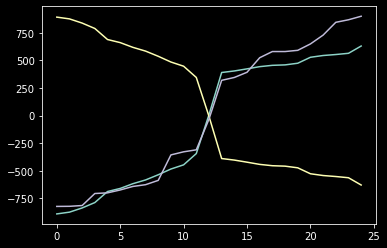

In [245]:
plt.plot(s.o.T[:,0:3]);

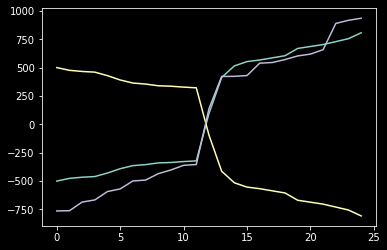

In [247]:
plt.plot(t.o.T[:,0:3]);

In [212]:
mode(np.diff(x),1)

ModeResult(mode=array([[-1358],
       [-2253],
       [-2396],
       [-2602],
       [-2850],
       [-2880],
       [-2513],
       [-2834],
       [-2746]]), count=array([[2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]]))

In [195]:
mode(a1,axis=2)

ModeResult(mode=array([[[ -23],
        [  23],
        [-272],
        [ 272],
        [-166],
        [  19]],

       [[-129],
        [ 129],
        [-171],
        [ -71],
        [-138],
        [ 138]],

       [[-132],
        [ 132],
        [-175],
        [ -23],
        [-173],
        [ -90]]]), count=array([[[2],
        [2],
        [2],
        [2],
        [2],
        [2]],

       [[2],
        [2],
        [1],
        [1],
        [2],
        [2]],

       [[2],
        [2],
        [2],
        [2],
        [1],
        [1]]]))

In [136]:
from scipy.stats import mode

In [145]:
u.ndim

4

In [163]:
r = mode(u,axis=3)

In [165]:
u

array([[[[-5, -5, -5],
         [ 5,  5,  5]],

        [[-1, -3, -3],
         [ 1,  3,  3]]],


       [[[-6, -4, -4],
         [ 6,  4,  4]],

        [[-2, -2, -2],
         [ 2,  2,  2]]]])

In [164]:
r.count >= 3

array([[[[ True],
         [ True]],

        [[False],
         [False]]],


       [[[False],
         [False]],

        [[ True],
         [ True]]]])

In [131]:
u

array([[[[-5, -5, -5],
         [ 5,  5,  5]],

        [[-1, -3, -3],
         [ 1,  3,  3]]],


       [[[-6, -4, -4],
         [ 6,  4,  4]],

        [[-2, -2, -2],
         [ 2,  2,  2]]]])

In [102]:
s.o.shape

(4, 3)

In [111]:
s.o

array([[ 0,  3,  4],
       [ 0, -3, -4],
       [ 1,  2,  3],
       [-1, -2, -3]])

In [113]:
s.arr - t.arr

array([[1, 3],
       [9, 1],
       [5, 2]])

In [114]:
s.arr

array([[0, 2],
       [4, 1],
       [3, 3]])

In [115]:
t.arr

array([[-1, -1],
       [-5,  0],
       [-2,  1]])

In [121]:
u

array([[[-5, -5, -5],
        [ 5, -1, -3],
        [-1, -3, -3],
        [ 1, -3, -5]],

       [[-5,  1,  3],
        [ 5,  5,  5],
        [-1,  3,  5],
        [ 1,  3,  3]],

       [[-6, -4, -4],
        [ 4,  0, -2],
        [-2, -2, -2],
        [ 0, -2, -4]],

       [[-4,  0,  2],
        [ 6,  4,  4],
        [ 0,  2,  4],
        [ 2,  2,  2]]])

In [107]:
u[0,0]a

array([-5, -5, -5])

In [93]:
%time a = pd.DataFrame(t.o-s.o).T.mode().T

CPU times: user 5.76 ms, sys: 0 ns, total: 5.76 ms
Wall time: 5.88 ms


In [6]:
s.vision()

array([['.', 'B', '.', '.'],
       ['.', '.', '.', 'B'],
       ['.', '.', '.', '.'],
       ['.', '.', '.', '.'],
       ['S', '.', 'B', '.']], dtype='<U1')

In [7]:
s.o

array([[0, 2],
       [2, 0],
       [4, 1],
       [1, 4],
       [3, 3],
       [3, 3]])

In [128]:
s

.B..
...B
....
....
S.B.

In [61]:
scanners[0].df[['x','y']].agg(['min','max','range'])

AttributeError: 'range' is not a valid function for 'Series' object

In [27]:
cmin = scanners[0].arr.min(axis=0)
cmax =scanners[0].arr.max(axis=0)

In [28]:
cmax

array([4, 3])

In [30]:
cmax-cmin

array([4, 2])

In [31]:
cmin

array([0, 1])

In [34]:
np.arange(cmin[1], cmax[1])

array([1, 2])

In [33]:
np.zeros(shape=(5,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [36]:
x,y = np.meshgrid(scanners[0].arr[:,0], scanners[0].arr[:,1])

In [42]:
scanners[0].arr[0,:]

array([0, 2])